# Dinamika konstrukcija: Instaliranje, pokretanje i osnovne operacije u programskome jeziku Python, slobodne neprigušene oscilacije materijalne čestice
Sveučilišni diplomski - Ljetni semestar akademske godine 2020/2021  
Predavač: Ivan Hlača  
email: ivan.hlaca@uniri.hr  
soba G-338

### Instaliranje i pokretanje  
U informatičkom kabinetu G-109 je instaliran Python i dovoljno je pronaći na Desktopu ili Startu ikonu od Spyder-a.

### Plotanje funkcija

Plotanje odnosno crtanje funkcija je moguće nakon uvođenja modula *matplotlib.pyplot* koji će se u nastavku skraćeno pozivati kao *plt*. Nacrtati će se kvadratna funkcija pomoću tri parametra: a, b i c.

In [1]:
import matplotlib.pyplot as plt

In [2]:
def kvadratna_funkcija(x):
    return a*x*x + b*x + c

In [3]:
a = 1.7
b = -7.5
c = 3.5
#tek nakon zadavanja parametara a, b i c se moze pozvati kvadratna_funkcija
kvadratna_funkcija(10) #vrijednost funkcije za x=10

98.5

Kvadratna funkcija $y=f(x)=a*x^2+b*x+c$ će se nacrtati za 100 parova točaka $(x,y)$ unutar domene $x=[0,10⟩$. 

In [4]:
x = [] #prazna lista
y = [] #prazna lista
for i in range(100):
    x.append(i*0.1) #dodavanje clanova listi
    y.append(kvadratna_funkcija(i*0.1)) #dodavanje clanova listi

In [5]:
y[:8] #ispis y-koordinata za prvih sedam tocaka (tzv. slicing)

[3.5,
 2.767,
 2.068,
 1.4029999999999996,
 0.7720000000000002,
 0.17499999999999982,
 -0.3880000000000008,
 -0.9170000000000007]

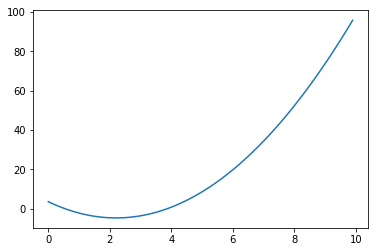

In [6]:
plt.plot(x,y)

In [7]:
#nultocke kvadratne funkcije pomocu uvjetne neredbe
for i in range(len(y)):
    if abs(y[i])<0.25:
        print(x[i])

0.5
3.9000000000000004


Nultočke kvadratne funkcije se mogu izravno tražiti prema sljedećoj formuli:  
$$x_{1,2}=\frac{-b\pm\sqrt{b^2-4ac}}{(2a)}$$ 
Rješenja jednadžbe su realni brojevi ako je zadovoljeno sljedeće $a\neq0$ i diskriminanta $d>0$. Ispod je napisana funkcija koja daje rješenje samo u slučaju kad su nultočke realni brojevi (u protivnom se dobije error).  
Pozivanjem naredbi iz modula *plt* se mogu dodati nultočke na graf te ga urediti pojašnjenjima i estetskih doradama. Traženje nultočki kvadratne jednadžbe je korisno za dobivanje vlastitih frekvencija sustava s dva stupnja slobode.

In [8]:
import math #uvodenje modula radi racunanja korijena diskriminante
def nultocke(a,b,c):
    d = b**2 - 4*a*c #diskriminanta
    nultocka_1 = (- b - math.sqrt(d))/(2*a)
    nultocka_2 = (- b + math.sqrt(d))/(2*a)
    return (nultocka_1,nultocka_2)

In [9]:
nultocke(a,b,c)

(0.5304440742792808, 3.881320631603072)

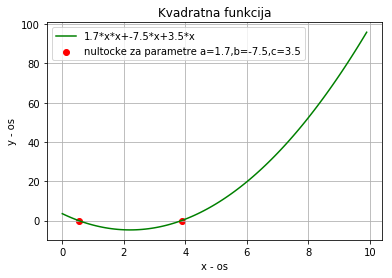

In [10]:
plt.plot(x,y,
         label=f"{a}*x*x+{b}*x+{c}*x", #tzv. f-string sintaksa za ispis parametara a,b,c
         color="green") 
plt.scatter(nultocke(a,b,c),[0,0],
            label=f"nultocke za parametre a={a},b={b},c={c}", #tzv. f-string sintaksa za ispis parametara a,b,c
            color="red") 
plt.title("Kvadratna funkcija")
plt.xlabel("x - os")
plt.ylabel("y - os")
plt.grid() #raster horizontalnih i vertikalnih linija
plt.legend()
plt.show()

Podaci za plotanje se mogu nalaziti i u nekoj tablici - npr. digitalni zapis x i y komponenti potresa preuzet s web-a.

https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/elcentro.dat

In [11]:
#load csv lokalno
#load csv online
#plt.plot

### Slobodne neprigušene oscilacije materijalne čestice
Traži se rješenje diferencijalne jednadžbe koja opisuje gibanje materijalne čestice nakon pomicanja iz ravnotežnog položaja:  

$$m\ddot{x}+kx=0 \tag{1}$$  

Ovakvo gibanje se zove slobodno neprigušeno osciliranje te se sastoji od inercijalne sile $m\ddot{x}$ i elastične sile $kx$. Ranije (davno) je pronađeno rješenje koje zadovoljava gornju jednadžbu:  

$$x=A\cos{\omega t}+B\sin{\omega t} \tag{2}$$  

gdje je $\omega = \sqrt{\frac{k}{m}}$;  

Radi provjere ispravnosti rješenja $x$ se uvrsti u jednadžbu (1) koja se može zapisati kao $\ddot{x}+\omega^2 x=0$. Prvo se izračuna druga derivacija od $x$ pa se onda može napraviti provjera:  
  
$$\dot{x}=-A\omega\sin{\omega t}+B\omega\cos{\omega t} \tag{3}$$  
  
$$\ddot{x}=-A\omega^2\cos{\omega t}-B\omega^2\sin{\omega t}=-\omega^2 (A\cos{\omega t}+B\sin{\omega t}) \tag{4}$$
  
$$\\-\omega^2 x + \omega^2 x = 0 \tag{5}$$
  
Obzirom da je jednakost u jednadžbi (5) zadovoljena, pokazano je da rješenje (2) zadovoljava jednadžbu (1). Parametri gibanja $A$ i $B$ se mogu dobiti pomoću rubnih uvjeta:  
$x=x_0$ prema jednadžbi (2) iz čega se dobije $A=x_0$  
$\dot{x_0}=\dot{x_0}$ prema jednadžbi (3) iz čega se dobije $B=\frac{v_0}{\omega}$  
gdje su početni početni položaj $x_0$, početna brzina $v_0$ i kružna frekvencija $\omega$ poznate veličine.  
Rješenje diferencijalne jednadžbe se sada može zapisati na sljedeći način:

$$x=x_0 \cos{\omega t}+\frac{v_0}{\omega} \sin{\omega t} \tag{6}$$

In [12]:
def slobodne_neprigusene(t,x_0,v_0): #jednadzba polozaja ovisna o vremenu t i pocetnim uvjetima
    return x_0*math.cos(omega*t)+(v_0/omega)*math.sin(omega*t)

UBACITI SVOJU SLIKU NA GITHUB

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20171213112855424-0593:9781316761403:fig2_1.png?pub-status=live">
izvor:   

https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20171213112855424-0593:9781316761403:fig2_1.png?pub-status=live

Potrebno je prikazati gibanje materijalne čestice za primjer na slici, s time da se prigušenje $c$ i vanjska sila $p(t)$ mogu ZANEMARITI! Parametri i početni uvjeti su zadani ispod.

In [13]:
#definicija parametara u SI mjernim jedinicama
k = 7000 #krutost opruge u [N/m] (ovdje može biti aksijalna ili savojna krutost stapa)
m = 2500 #masa materijalne cestice u [kg] (ovdje može biti masa objesena na kraj stapa)
omega = math.sqrt(k/m) #kruzna frekvencija
x_0 = 0.00 #pocetni polozaj u [m]
v_0 = -0.08 #pocetna brzina u [m/s]

Definirana je funkcija koja opisuje gibanje materijalne čestice ovisno o vremenu i definirani su parametri $k$ i $m$ iz čega slijedi $\omega$. Početni uvjeti položaja i brzine su dani kao $x_0$ i $v_0$. Sada se položaj materijalne čestice ovisno o vremenu može pokazati na grafu (plotu) jednakim postupkom kao ranije. Razmatrati će se prvih 10 sekundi u vremenskim koracima od 0.1 s odnosno $x=[0.0 s,10.0 s⟩$

In [14]:
vrijeme = [] 
polozaj = [] 
for i in range(100):
    vrijeme.append(i*0.1) 
    polozaj.append(slobodne_neprigusene(i*0.1,x_0,v_0)) 

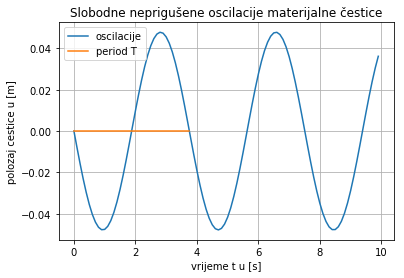

In [15]:
plt.plot(vrijeme,polozaj, label="oscilacije")
T = 2*math.pi/omega
plt.plot([0,T],[0,0], label="period T")
plt.title("Slobodne neprigušene oscilacije materijalne čestice")
plt.xlabel("vrijeme t u [s]")
plt.ylabel("polozaj cestice u [m]")
plt.grid()
plt.legend()
plt.show()

Gibanje materijalne točke..  
interact... 
OVO RADI SAMO U JUPYTERu
interact u Spyder se radi: from matplotlib.widgets import Slider

In [16]:
from ipywidgets import interact

L = 0.1 #pocetna duljina opruge/stapa
def gibanje(t):
    fig, ax = plt.subplots(1, 2, figsize=(16, 3))
    ax[0].plot(vrijeme,polozaj,color='green')
    ax[0].axvline(t,color='black')
    ax[0].grid()
    L_stvarni = L+slobodne_neprigusene(t,x_0,v_0)
    ax[1].scatter(L_stvarni,0,s=1000) #s je velicina tocke
    ax[1].plot([i/100*L_stvarni for i in range(1,100)],
                [0.01*math.sin(i) for i in range(1,100)])
    ax[1].axvline(L,color='black')
    ax[1].set_xlim(0.0,0.15)
    plt.show()

interact(gibanje, t = (0,10))

interactive(children=(IntSlider(value=5, description='t', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.gibanje(t)>

Analiza utjecaja početnih uvjeta na gibanje točke.

In [17]:
def analiza(x_0,v_0):
    t = [] 
    polozaj = []
    for i in range(100):
        t.append(i*0.1)
        polozaj.append(slobodne_neprigusene(i*0.1,x_0,v_0))
    plt.plot(t,polozaj)
    plt.ylim(-3,5)
    plt.grid()

interact(analiza, x_0 = (-1,3), v_0 = (-3,5))

interactive(children=(IntSlider(value=1, description='x_0', max=3, min=-1), IntSlider(value=1, description='v_…

<function __main__.analiza(x_0, v_0)>

Završno... import numpy samo kao primjer  
umjesto parova točaka..